In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import cv2 as cv
import os, glob, shutil

In [3]:
path = 'datasets/COVID19_Xray/'
train = os.listdir(path)

#possible labels
labels=["covid", "normal", "pneumonia"]
print (f'The labels are {labels}')

#image size
image_size = 224
print(f'All images to be resized into {image_size}*{image_size} pixels')

The labels are ['covid', 'normal', 'pneumonia']
All images to be resized into 224*224 pixels


In [4]:
images = []
tags = []
#Read all images via label
for label in labels:
    direc = os.path.join(path, label)
    class_num = labels.index(label)
    
    #for each image in folder
    for image in os.listdir(direc):
        #Read and greyscale and image
        image_read = cv.imread(os.path.join(direc,image))
        #Resize image
        image_resized = cv.resize(image_read,(image_size,image_size))
        #Add image to list
        images.append(image_resized)
        tags.append(class_num)

In [5]:
model = tf.keras.applications.MobileNetV2(include_top=False,
weights='imagenet', input_shape=(224, 224, 3))

In [6]:
images = np.array(images)

In [7]:
print(images.shape)

(4575, 224, 224, 3)


In [10]:
predictions = model.predict(images)

In [11]:
pred_images = predictions.reshape(images.shape[0], -1)

In [10]:
k = 3
kmodel = KMeans(n_clusters = k)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)

In [20]:
i=0
correct=0

for i in range(len(kpredictions)):
    #calculates accuracy 
    if tags[i] == kpredictions[i]:
        correct += 1
    i = i + 1
    
#Calculate percentage of correct guesses    
print("Correct: " + str(((correct/i)*100)) + "%")  

Correct: 29.398907103825138%


In [21]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    print("loop")
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   'euclidean'))
    kl.append(k)

loop
loop
loop
loop
loop
loop


MemoryError: Unable to allocate 1.07 GiB for an array with shape (4575, 62720) and data type float32

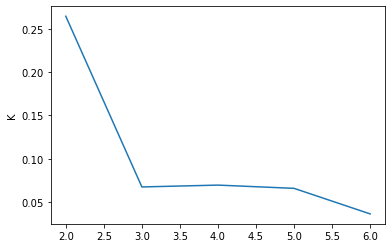

In [25]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()

In [ ]:
k = 3
agglo = AgglomerativeClustering(n_clusters = k)
agglo.fit(pred_images)


In [ ]:
agglopredictions = agglo.labels_

In [14]:
print(len(agglopredictions))

4575


In [17]:
i=0
correct=0

for i in range(len(agglopredictions)):
    #calculates accuracy 
    if tags[i] == agglopredictions[i]:
        correct += 1
    i = i + 1
    
#Calculate percentage of correct guesses    
print("Correct: " + str(((correct/i)*100)) + "%") 

Correct: 37.923497267759565%


In [ ]:
i = 0
correct = 0
TP = [0,0,0]
FP = [0,0,0]
FN = [0,0,0]
TN = [0,0,0]

TPR = np.array([[0] * test_dataNP.size, [0] * test_dataNP.size, [0] * test_dataNP.size],dtype=object)
FPR = np.array([[0] * test_dataNP.size, [0] * test_dataNP.size, [0] * test_dataNP.size],dtype=object)

for x in range(len(agglopredictions)):  
    
    #calculates accuracy 
    if tags[i] == agglopredictions[i]:
        correct += 1
    
    
    if tags[i] == 0:
        if tags[i] == agglopredictions[i]:
            TP[0] += 1
            TN[1] += 1
            TN[2] += 1
        elif agglopredictions[i] == 1:
            FP[1]+= 1
            FN[0] += 1
        else:
            FP[2] += 1
            FN[0] += 1
            
    elif tags[i] == 1:
        if tags[i] == agglopredictions[i]:
            TP[1] += 1
            TN[0] += 1
            TN[2] += 1
        elif agglopredictions[i] == 0:
            FP[0] += 1
            FN[1] += 1
        else:
            FP[2] += 1
            FN[1] += 1
            
    else:
        if tags[i] == agglopredictions[i]:
            TP[2] += 1
            TN[1] += 1
            TN[0] += 1
        elif agglopredictions[i] == 1:
            FP[1] += 1
            FN[2] += 1
        else:
            FP[0] += 1
            FN[2] += 1

        
    i = i + 1
    
#Calculate percentage of correct guesses    
print("Correct: " + str(((correct/i)*100)) + "%")   

In [1]:
clusters = 2
agglo2 = AgglomerativeClustering(n_clusters = k)
agglo2.fit(pred_images)


NameError: name 'AgglomerativeClustering' is not defined